<a href="https://colab.research.google.com/github/giakomorssi/Machine_Learning/blob/main/01_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the Data

In [73]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Change Colab runtime to GPU
import os
os.environ['COLAB_TPU_ADDR'] = ''
os.environ['COLAB_GPU_ALLOC'] = '1'
os.environ['COLAB_GPU'] = '1'
print("Runtime switched to GPU")

import tensorflow as tf

# This code sets the runtime to use the GPU if available
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

pd.set_option('display.max_columns', None)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Runtime switched to GPU
Please install GPU version of TF


In [74]:
df = pd.read_csv('/content/drive/MyDrive/University/ML/customer_segmentation.csv')

Discuss correlations and how the data is distributed also using Visualization. In particular try to answer to these questions:

*   Looking the price do you think the dataset is balanced?
*   Looking the customer_city distribution do you think the dataset is balanced?

# Meaning of the Columns


* **order_id**: unique order identifier 
* **customer_id**: the key to the orders dataset. Each 
order has a unique customer_id 
* **customer_unique_id**: the unique identifier of a customer.
* **customer_city**: customer city name
* **customer_state**: customer state
* **order_item_id**: sequential number identifying the number of items included in the same order.
* **product_id**: product unique identifier
* **price**: item price
* **freight_value**: item freight value item (if an order has more than one item, the freight value is split between items)
* **payment_type**: method of payment chosen by the customer.
* **payment_installments**: number of installments chosen by the customer.
* **payment_value**: transaction value.
* **order_status**: the order status (delivered, shipped, etc).
* **order_purchase_timestamp**: purchase timestamp.
* **order_approved_at**: purchase approval timestamp.
* **order_delivered_carrier_date**: order posting timestamp. When it was handled by the logistic partner.
* **order_delivered_customer_date**: actual order delivery date to the customer.
* **order_estimated_delivery_date**: the estimated delivery date informed to the customer at the purchase moment.
* **shipping_limit_date**: the deadline by which the seller must have the order ready to be shipped
* **product_category_name**: root product category, in Portuguese.
* **product_category_name_english**: root category of product, in English
* **product_name_lenght**: number of characters extracted from the product name.
* **product_description_lenght**: number of characters extracted from the product description.
* **seller_id**: seller unique identifier
* **seller_city**: seller city name
* **seller_state**: seller state

# Rename the Columns

In [75]:
df.rename(columns={'order_purchase_timestamp': 'purchase_date', 
                    'order_approved_at': 'approved_date', 
                    'order_delivered_carrier_date': 'handled_by_logistic_date',
                    'order_delivered_customer_date': 'delivery_date',
                    'order_estimated_delivery_date': 'estimated_delivery_date',
                    'order_item_id': 'item_per_order'
                    }, inplace=True)
df.head()

,order_id,customer_id,order_status,purchase_date,approved_date,handled_by_logistic_date,delivery_date,estimated_delivery_date,payment_type,payment_installments,payment_value,customer_unique_id,customer_city,customer_state,item_per_order,product_id,seller_id,shipping_limit_date,price,freight_value,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_category_name_english
0,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,boleto,1,141.46,af07308b275d755c9edb36a90c618231,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.7,22.76,belo horizonte,SP,perfumaria,29,178,perfumery
1,86674ccaee19790309333210917b2c7d,1b338293f35549b5e480b9a3d7bbf3cd,delivered,2018-08-09 11:37:35,2018-08-09 14:35:19,2018-08-10 14:34:00,2018-08-14 18:51:47,2018-08-22 00:00:00,credit_card,5,135.82,8b8028d453a01986b48c4271cc341475,ituverava,SP,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-08-13 14:31:29,116.9,18.92,belo horizonte,SP,perfumaria,29,178,perfumery
2,aee682982e18eb4714ce9f97b15af5e2,8858442ea4d5dc5bb9e118e8f728095d,delivered,2018-07-09 18:46:28,2018-07-11 03:45:45,2018-07-11 15:01:00,2018-07-12 18:14:35,2018-07-18 00:00:00,boleto,1,128.04,3edcab192482e9871c17b34cf98c3996,ribeirao das neves,MG,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-13 03:45:45,118.7,9.34,belo horizonte,SP,perfumaria,29,178,perfumery
3,d543201a9b42a1402ff97e65b439a48b,971bf8f42a9f8cb3ead257854905b454,delivered,2018-08-21 10:00:25,2018-08-21 10:50:54,2018-08-22 15:21:00,2018-08-28 18:58:22,2018-09-10 00:00:00,credit_card,2,279.30,958ac7760e5484df1496ba5833ab6117,gaspar,SC,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-08-23 10:50:54,116.9,22.75,belo horizonte,SP,perfumaria,29,178,perfumery
4,d543201a9b42a1402ff97e65b439a48b,971bf8f42a9f8cb3ead257854905b454,delivered,2018-08-21 10:00:25,2018-08-21 10:50:54,2018-08-22 15:21:00,2018-08-28 18:58:22,2018-09-10 00:00:00,credit_card,2,279.30,958ac7760e5484df1496ba5833ab6117,gaspar,SC,2,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-08-23 10:50:54,116.9,22.75,belo horizonte,SP,perfumaria,29,178,perfumery


# Exploratory Data Analysis

## Data Structure & Distributions

In [76]:
print(df.shape, '\n')

print(df.info())

(13801, 26) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13801 entries, 0 to 13800
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       13801 non-null  object 
 1   customer_id                    13801 non-null  object 
 2   order_status                   13801 non-null  object 
 3   purchase_date                  13801 non-null  object 
 4   approved_date                  13801 non-null  object 
 5   handled_by_logistic_date       13801 non-null  object 
 6   delivery_date                  13801 non-null  object 
 7   estimated_delivery_date        13801 non-null  object 
 8   payment_type                   13801 non-null  object 
 9   payment_installments           13801 non-null  int64  
 10  payment_value                  13801 non-null  float64
 11  customer_unique_id             13801 non-null  object 
 12  customer_city                  1

The dataset has `13801 rows` and `26 columns`.

The columns are either `float64(3)`, `int64(4)`, `object(19)`

From what you know about the features of your dataset, do the data types make sense? Do you need to change any?

There are no `Null values` in the dataset.

---

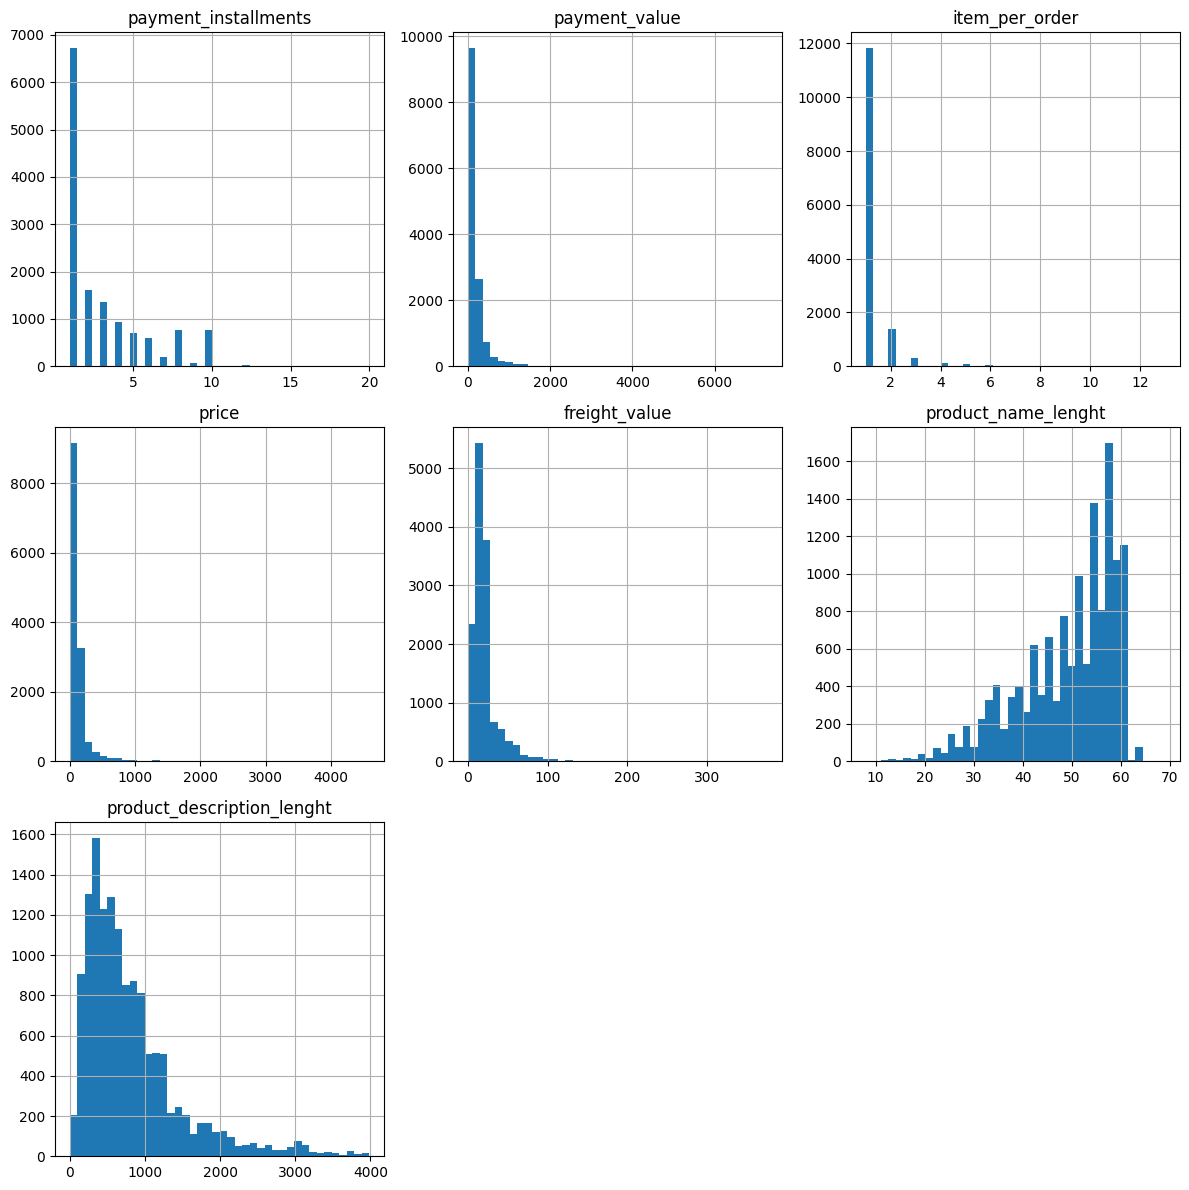

In [72]:
from matplotlib import pyplot as plt

df.hist(figsize=(12,12), bins=40) 
plt.tight_layout()
plt.show()

**Discuss the distributions:**

`Product_description_lenght` is a skewd normal distribution, like also the `product_name_lenght`. 

The `price`, `payment_value` and `freight_value` have a lot of values close to zero and of course they dont have negative values, also skewed

`payment_installment` and `item_per_order` are categorical but also here we see some imbalance.

**Do there appear to be outliers?**

There could be outliers due to the skewness of the distribution but with the boxplots we check better



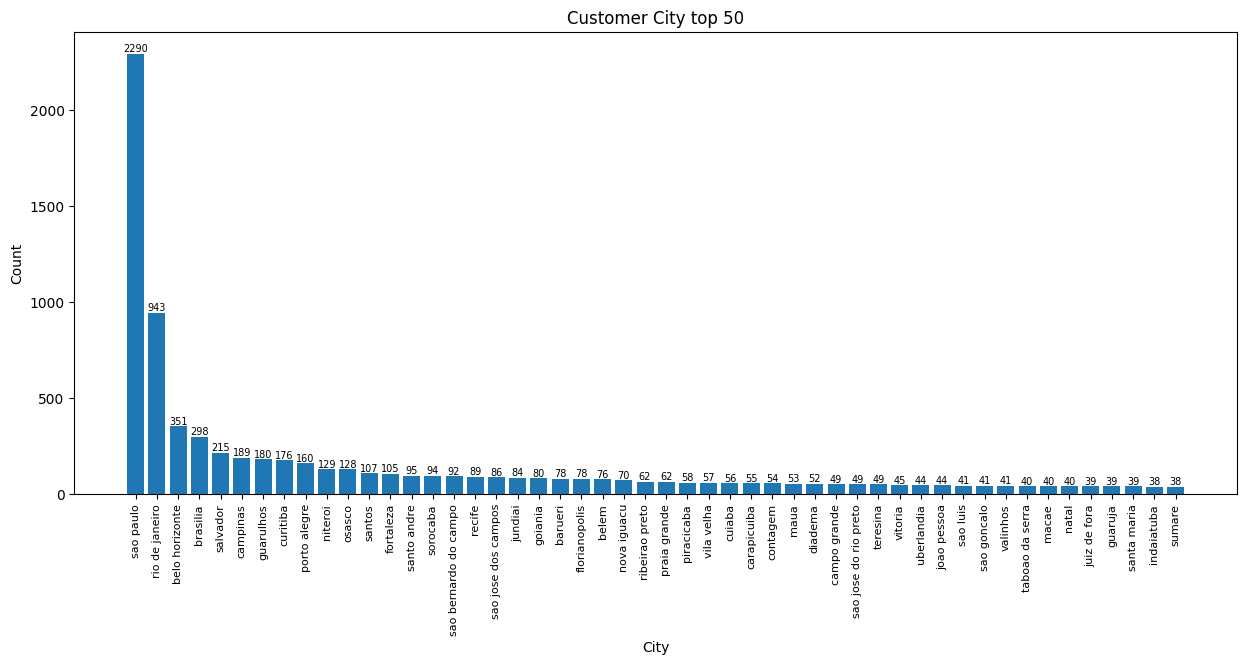

In [119]:
# Customer City
fig, ax = plt.subplots(figsize=(15, 6))
city_counts = df['customer_city'].value_counts()
plt.bar(city_counts.index[:50], city_counts.values[:50])
plt.xticks(rotation=90, fontsize=8)
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Customer City top 50')
for i, v in enumerate(city_counts.values[:50]):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=7)
plt.show()

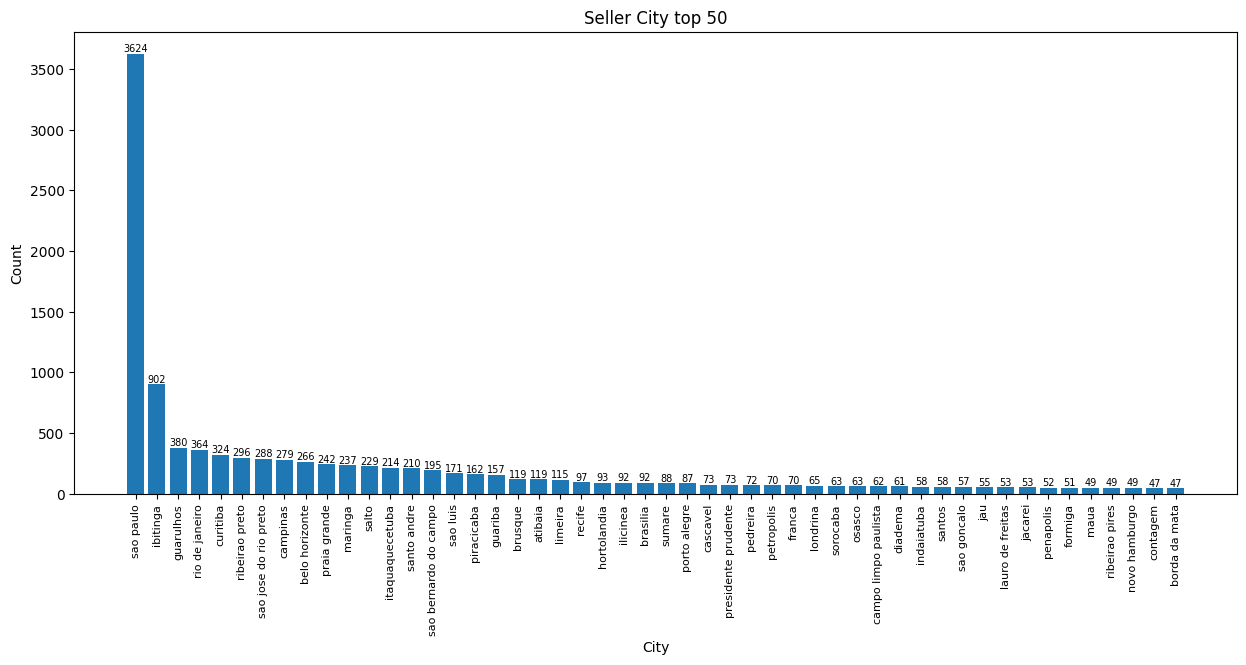

In [118]:
# Seller City
fig, ax = plt.subplots(figsize=(15, 6))
city_counts = df['seller_city'].value_counts()
plt.bar(city_counts.index[:50], city_counts.values[:50])
plt.xticks(rotation=90, fontsize=8)
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Seller City top 50')
for i, v in enumerate(city_counts.values[:50]):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=7)
plt.show()

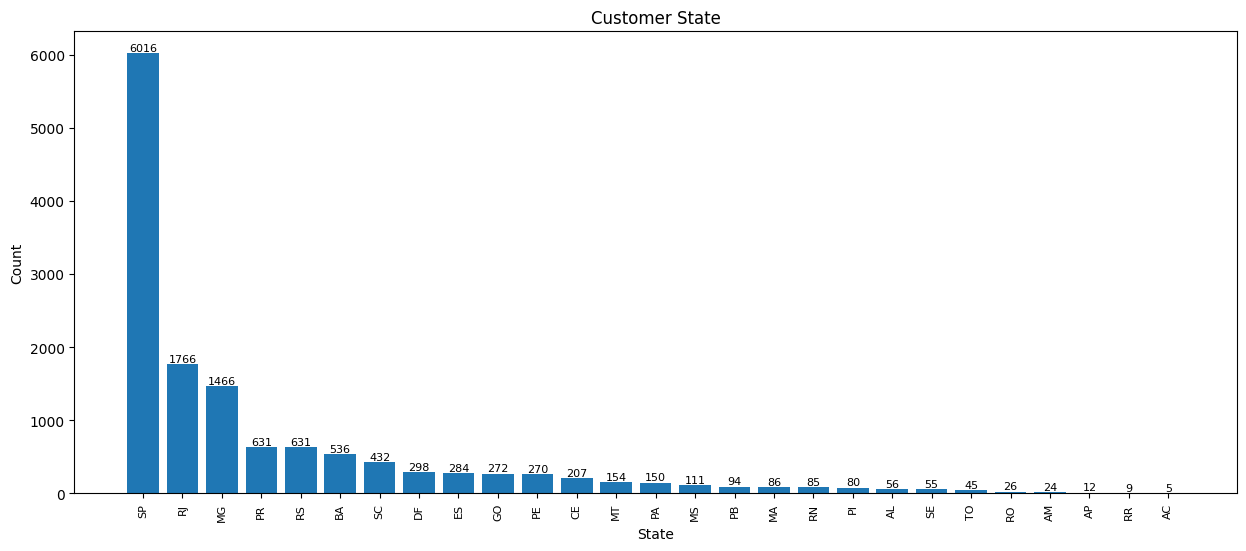

In [121]:
# Customer State
fig, ax = plt.subplots(figsize=(15, 6))
city_counts = df['customer_state'].value_counts()
plt.bar(city_counts.index, city_counts.values)
plt.xticks(rotation=90, fontsize=8)
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Customer State')
for i, v in enumerate(city_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=8)
plt.show()

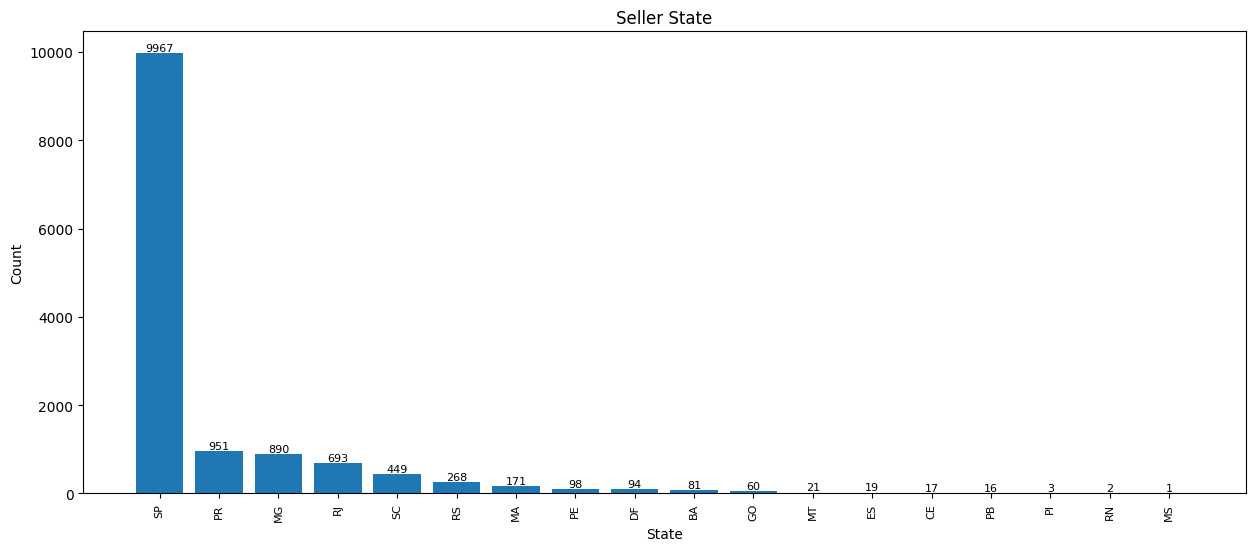

In [122]:
# Seller State
fig, ax = plt.subplots(figsize=(15, 6))
city_counts = df['seller_state'].value_counts()
plt.bar(city_counts.index, city_counts.values)
plt.xticks(rotation=90, fontsize=8)
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Seller State')
for i, v in enumerate(city_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=8)
plt.show()

As we expected the Customer City has few cities with high frequency and more cities with few orders. San Paulo is the most frequent with 2290. the second most frequent is Inbitinga with only 943.

Same with the Seller City, where San Paulo is the most frequent with 3624. the second most frequent is Inbitinga with only 902.

The same is for Customer State and Seller State, since they are retreved from the corresponding city.

---

In [123]:
df.describe()

,payment_installments,payment_value,item_per_order,price,freight_value,product_name_lenght,product_description_lenght
count,13801.000000,13801.000000,13801.000000,13801.000000,13801.000000,13801.000000,13801.000000
mean,3.014637,194.349691,1.230491,130.947103,21.938168,49.300703,814.330411
std,2.801721,294.854258,0.737495,210.712421,18.567013,9.759529,648.790194
min,1.000000,0.050000,1.000000,0.850000,0.000000,8.000000,4.000000
25%,1.000000,66.750000,1.000000,40.000000,12.870000,43.000000,366.000000
50%,2.000000,120.290000,1.000000,79.000000,18.230000,52.000000,631.000000
75%,4.000000,206.780000,1.000000,139.000000,23.310000,57.000000,1030.000000
max,20.000000,7274.880000,13.000000,4590.000000,375.280000,69.000000,3985.000000


Everything looks normal with these statistics

---

## Null Values & Duplicates

In [48]:
print(f'Before: {df.duplicated().sum()}')

df.drop_duplicates(inplace=True)

print(f'After: {df.duplicated().sum()}')

Before: 83
After: 0


In [49]:
df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
purchase_date                    0
approved_date                    0
handled_by_logistic_date         0
delivery_date                    0
estimated_delivery_date          0
payment_type                     0
payment_installments             0
payment_value                    0
customer_unique_id               0
customer_city                    0
customer_state                   0
item_per_order                   0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
seller_city                      0
seller_state                     0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_category_name_english    0
dtype: int64

## Outliers

**price:**
The mean is close to zero, the black dots arent outliers

**freight value:** 
The mean is close to zero, the black dots arent outliers

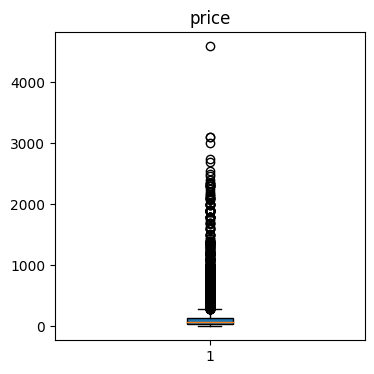

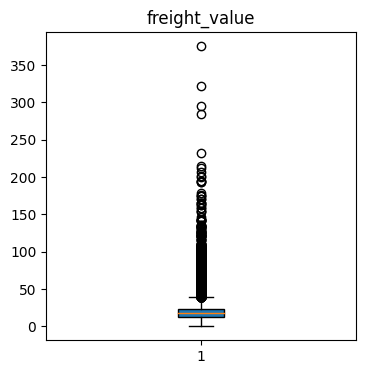

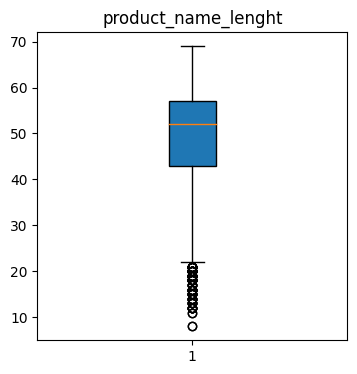

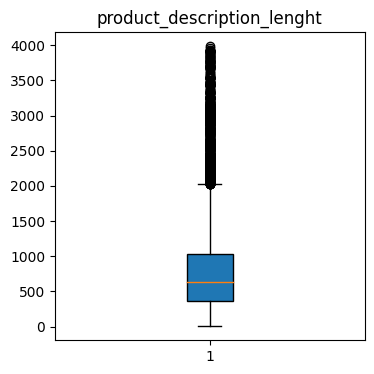

In [127]:
import matplotlib.pyplot as plt

# Filter for only continuous variables
cont_vars = ['price', 'freight_value', 'product_name_lenght', 'product_description_lenght']

for var in cont_vars:
    plt.figure(figsize=(4,4))
    plt.boxplot(df[var], vert=True, patch_artist=True)
    plt.title(var)
    plt.show()

Do you have outliers (represented as dark circles on the boxplots) in your variables?

Why do you think you have outliers?

Do the outliers represent real observations (i.e. not errors)?

Should you exclude these observations? If not, should you winsorize the values?

---

## Correlations/Relationships

In [51]:
df.corr().style.background_gradient(cmap='coolwarm').set_precision(4).set_properties(**{'max-width': '100px'})

<ipython-input-51-dce74a2f4cc2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().style.background_gradient(cmap='coolwarm').set_precision(4).set_properties(**{'max-width': '100px'})
<ipython-input-51-dce74a2f4cc2>:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df.corr().style.background_gradient(cmap='coolwarm').set_precision(4).set_properties(**{'max-width': '100px'})


,payment_installments,payment_value,item_per_order,price,freight_value,product_name_lenght,product_description_lenght
payment_installments,1.0000,0.3081,0.0708,0.2963,0.2061,-0.0062,0.0319
payment_value,0.3081,1.0000,0.2297,0.7664,0.3834,-0.0024,0.1658
item_per_order,0.0708,0.2297,1.0000,-0.0700,-0.0501,-0.0182,-0.0281
price,0.2963,0.7664,-0.0700,1.0000,0.4147,0.0160,0.1872
freight_value,0.2061,0.3834,-0.0501,0.4147,1.0000,0.0487,0.1205
product_name_lenght,-0.0062,-0.0024,-0.0182,0.0160,0.0487,1.0000,0.1127
product_description_lenght,0.0319,0.1658,-0.0281,0.1872,0.1205,0.1127,1.0000


Which variables are most correlated? 

`price` and `payment_value` have a `correlation of 76%`

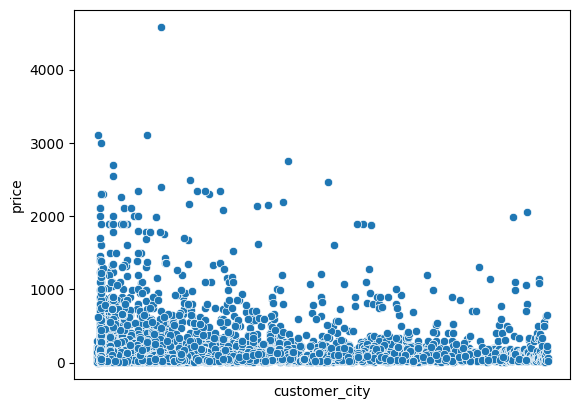

In [131]:
import seaborn as sns

sns.scatterplot(data=df, x='customer_city', y='price')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.xticks(rotation=90)
plt.show()

## Feature Engineering

1. Remove the `customer_id`, `order_id`, `customer_unique_id`, `order_item_id`, `product_id`, `seller_id`, `product_category_name` columns.

2. Convert the `order_status`, `payment_type`, `product_category_name_english` columns to a categorical variable.

3. Remove from `order_estimated_delivery_date` column the `time`

4. Encode the `customer_city`, `customer_state`, `seller_city`, `seller_state` columns.

In [53]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Order Status
df['order_status'] = le.fit_transform(df['order_status'])

# payment_type
df['payment_type'] = le.fit_transform(df['payment_type'])

# product_category_name_english
df['product_category_name_english'] = le.fit_transform(df['product_category_name_english'])

In [61]:
import pandas as pd
#!pip install category_encoders
from category_encoders import LeaveOneOutEncoder

# initialize the encoder
enc = LeaveOneOutEncoder(cols=['customer_city', 'customer_state', 'seller_city', 'seller_state', 'product_category_name'])

# fit and transform the entire dataset
df = enc.fit_transform(df, df['price'])


## Date Objects

In [ ]:
df['purchase_date'] = pd.to_datetime(df['purchase_date'])
df['approved_date'] = pd.to_datetime(df['approved_date'])
df['handled_by_logistic_date'] = pd.to_datetime(df['handled_by_logistic_date'])
df['delivery_date'] = pd.to_datetime(df['delivery_date'])
df['estimated_delivery_date'] = pd.to_datetime(df['estimated_delivery_date'])
df['shipping_limit_date'] = pd.to_datetime(df['shipping_limit_date'])

In [62]:
# time between purchase and approved 
df['purchase_approved_time'] = round((df['approved_date']-df['purchase_date']).dt.total_seconds()/(60), 2)
# time between approved and handled by logistic 
df['approved_handled_time'] = round((df['handled_by_logistic_date']-df['approved_date']).dt.total_seconds()/(60), 2)
# time between handled and delivery 
df['handled_delivery_time'] = round((df['delivery_date']-df['handled_by_logistic_date']).dt.total_seconds()/(60), 2)
# time between delivery and estimated 
df['delivery_estimated_time'] = round((df['estimated_delivery_date']-df['delivery_date']).dt.total_seconds()/(60), 2)

# Export the Data

In [64]:
df.head()

,order_id,customer_id,order_status,purchase_date,approved_date,handled_by_logistic_date,delivery_date,estimated_delivery_date,payment_type,payment_installments,payment_value,customer_unique_id,customer_city,customer_state,item_per_order,product_id,seller_id,shipping_limit_date,price,freight_value,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_category_name_english,purchase_approved_time,approved_handled_time,handled_delivery_time,delivery_estimated_time
0,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,1,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,0,1,141.46,af07308b275d755c9edb36a90c618231,155.974000,149.392957,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.7,22.76,88.027414,116.608786,122.827009,29,178,55,1842.83,666.55,17336.75,7712.25
1,86674ccaee19790309333210917b2c7d,1b338293f35549b5e480b9a3d7bbf3cd,1,2018-08-09 11:37:35,2018-08-09 14:35:19,2018-08-10 14:34:00,2018-08-14 18:51:47,2018-08-22,1,5,135.82,8b8028d453a01986b48c4271cc341475,131.450000,113.491669,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-08-13 14:31:29,116.9,18.92,88.034259,116.608968,122.832287,29,178,55,177.73,1438.68,6017.78,10388.22
2,aee682982e18eb4714ce9f97b15af5e2,8858442ea4d5dc5bb9e118e8f728095d,1,2018-07-09 18:46:28,2018-07-11 03:45:45,2018-07-11 15:01:00,2018-07-12 18:14:35,2018-07-18,0,1,128.04,3edcab192482e9871c17b34cf98c3996,76.536923,125.816993,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-13 03:45:45,118.7,9.34,88.027414,116.608786,122.827009,29,178,55,1979.28,675.25,1633.58,7545.42
3,d543201a9b42a1402ff97e65b439a48b,971bf8f42a9f8cb3ead257854905b454,1,2018-08-21 10:00:25,2018-08-21 10:50:54,2018-08-22 15:21:00,2018-08-28 18:58:22,2018-09-10,1,2,279.30,958ac7760e5484df1496ba5833ab6117,820.847500,146.354385,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-08-23 10:50:54,116.9,22.75,88.034259,116.608968,122.832287,29,178,55,50.48,1710.10,8857.37,17581.63
4,d543201a9b42a1402ff97e65b439a48b,971bf8f42a9f8cb3ead257854905b454,1,2018-08-21 10:00:25,2018-08-21 10:50:54,2018-08-22 15:21:00,2018-08-28 18:58:22,2018-09-10,1,2,279.30,958ac7760e5484df1496ba5833ab6117,820.847500,146.354385,2,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-08-23 10:50:54,116.9,22.75,88.034259,116.608968,122.832287,29,178,55,50.48,1710.10,8857.37,17581.63


In [58]:
df.to_csv('/content/drive/MyDrive/University/ML/customer_segmentation_eda.csv', index=False)

During your pitch, try to answer the following questions:

What are the main features of the dataset that you discovered during the exploratory data analysis (EDA) process?

What method did you choose to tackle the tasks of the project, and why did you select this method?

What score did you choose to evaluate your model's performance, and what is the score's value?

If your group is working with the Customers Segmentation dataset, please discuss only one market segmentation among the three available.